<a href="https://colab.research.google.com/github/sangam11a/sarcasm-conv/blob/main/sarcasm_conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2022-08-02 11:45:33--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.176, 172.217.1.208, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.03s   

2022-08-02 11:45:33 (175 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [3]:
import json

# Load the JSON file
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

# Initialize the lists
sentences = []
labels = []

# Collect sentences and labels into the lists
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [4]:
training_size = 20000

# Split the sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# Split the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [6]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [9]:
#Build and Compile the Model
import tensorflow as tf

# Parameters
embedding_dim = 16
filters = 128
kernel_size = 5
dense_dim = 6

# Model Definition with Conv1D
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_conv.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 conv1d (Conv1D)             (None, 116, 128)          10368     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
__________________________________________________

In [10]:
NUM_EPOCHS = 10

# Train the model
history_conv = model_conv.fit(training_padded, training_labels, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))


Epoch 1/10
625/625 [==============================] - 16s 5ms/step - loss: 0.4504 - accuracy: 0.7725 - val_loss: 0.3717 - val_accuracy: 0.8380
Epoch 2/10
625/625 [==============================] - 3s 4ms/step - loss: 0.2298 - accuracy: 0.9072 - val_loss: 0.3777 - val_accuracy: 0.8474
Epoch 3/10
625/625 [==============================] - 3s 4ms/step - loss: 0.1182 - accuracy: 0.9585 - val_loss: 0.4408 - val_accuracy: 0.8410
Epoch 4/10
625/625 [==============================] - 3s 4ms/step - loss: 0.0488 - accuracy: 0.9860 - val_loss: 0.5711 - val_accuracy: 0.8354
Epoch 5/10
625/625 [==============================] - 3s 4ms/step - loss: 0.0202 - accuracy: 0.9952 - val_loss: 0.6708 - val_accuracy: 0.8338
Epoch 6/10
625/625 [==============================] - 3s 4ms/step - loss: 0.0067 - accuracy: 0.9987 - val_loss: 0.7952 - val_accuracy: 0.8326
Epoch 7/10
625/625 [==============================] - 3s 4ms/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.8397 - val_accuracy: 0.8305
Epoch

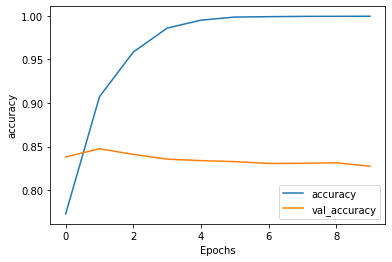

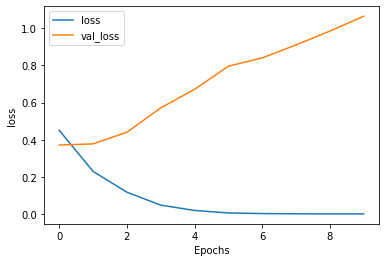

In [11]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history_conv, 'accuracy')
plot_graphs(history_conv, 'loss')

In [4]:

!git init
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/sangam11a/sarcasm-double-lstm.git
!git push -u origin main

Reinitialized existing Git repository in /content/.git/
On branch main
Untracked files:
	.config/
	sample_data/

nothing added to commit but untracked files present
fatal: remote origin already exists.
fatal: could not read Username for 'https://github.com': No such device or address
